In [1]:
import numpy as np
import onnxruntime as ort

In [2]:
session = ort.InferenceSession("pro-conservative-up2x.pth.onnx", providers=[ 'CUDAExecutionProvider','CPUExecutionProvider'])

In [3]:
!curl -o kiana.jpg https://truth.bahamut.com.tw/s01/202107/ec23b555017d6935bbdcd0d0eb49e69b.JPG
import cv2
img = cv2.imread("kiana.jpg")[:, :, [2, 1, 0]]

In [4]:
input_names="img"
output_names="out"
results = session.run([output_names], {
                      input_names: [img]})[0]

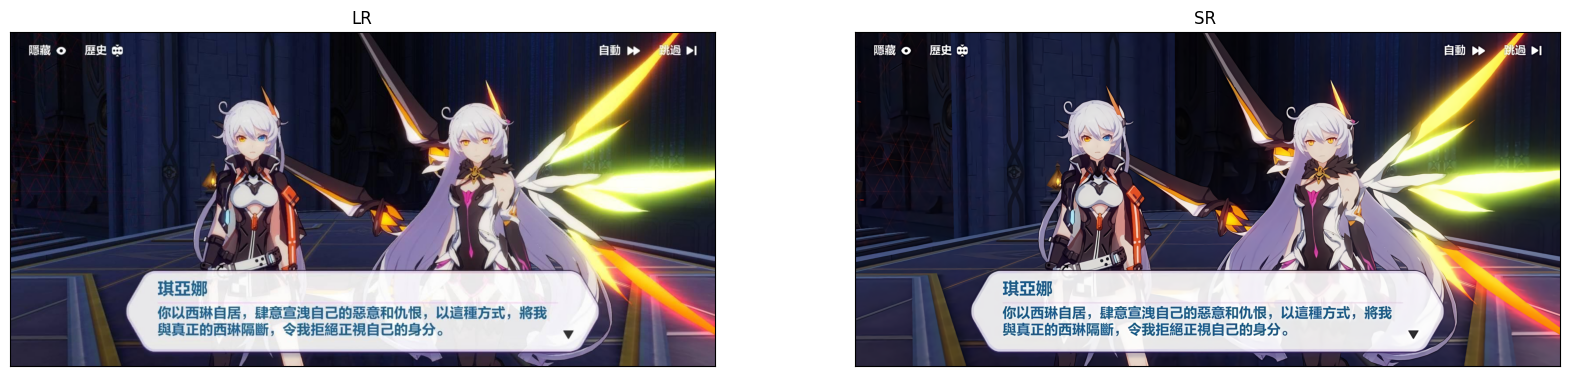

In [5]:
import matplotlib.pyplot as plt
results=np.squeeze(results)

images = [img,results]
titles = ['LR', 'SR ']
positions = [1,2]
plt.figure(figsize=(20, 20))
for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
    plt.subplot(2, 2, pos)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    

In [6]:
r=cv2.cvtColor(results,cv2.COLOR_RGB2BGR)
cv2.imwrite("kiana_2x.jpg",r)

True